In [1]:
import pandas as pd
import sys,os,copy,pdb,importlib
sys.path.append('../classes')
sys.path.append('../analysis')
import numpy as np
np.set_printoptions(precision=3,suppress=True)
import matplotlib.pyplot as plt

import tournament_new as tn
import create_database as cd
importlib.reload(tn)

from beck.beck_game import BeckGame as Game
from beck.beck_players import HumanBeckPlayer
from arena import Arena

import mcts

importlib.reload(tn)
game = Game(4,9,4)
all_p = pd.read_pickle(cd.DATABASE_LOC)

from pickle import Pickler, Unpickler
import pickle

# res = tn.merge_res_to_base()
tournament_res = pd.read_pickle('/scratch/zz737/fiar/tournaments/ai_all_player_round_robin_base.pkl')

from utils import *
mctsargs = dotdict({
        'numMCTSSims': 100,
        'cpuct': 2,
        })
import supervised_learning as sl
from importlib import reload
reload(sl)

<module 'supervised_learning' from '../classes/supervised_learning.py'>

In [2]:
from collections import OrderedDict
# aa =OrderedDict({'a':1,'b':2})

In [11]:
sl.nnet_dict['res15_color'].args

{'lr': 0.001,
 'dropout': 0.3,
 'epochs': 80,
 'batch_size': 64,
 'cuda': False,
 'num_channels': 256,
 'wl2': 0.0001,
 'n_res': 15,
 'res_ks': 3,
 'track_color': True}

In [5]:
args

{'lr': 0.001,
 'dropout': 0.3,
 'epochs': 80,
 'batch_size': 64,
 'cuda': False,
 'num_channels': 256,
 'wl2': 0.0001,
 'n_res': 3,
 'res_ks': 4}

In [73]:
checkpoint_dir = '/scratch/zz737/fiar/sl/resnet/res15_color_Ex_tournament_6_checkpoints_mcts100_cpuct2_id_1_checkpoint_55'
file = 'final'
args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
on_c = sl.OthelloNNet_resnet(game, args)
nnet_c = sl.NNetWrapper_color(game,nnet=on_c,args=args)
nnet_c.load_checkpoint(checkpoint_dir, file+'.pth.tar')

In [64]:
checkpoint_dir = '/scratch/zz737/fiar/tournaments/tournament_8/checkpoints_mcts100_cpuct2_id_res9-0'
file = 'checkpoint_36'
# checkpoint_dir = '/scratch/zz737/fiar/sl/resnet/res15_color_Ex_tournament_6_checkpoints_mcts100_cpuct2_id_1_checkpoint_55'
# file = 'final'
# args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
# on = sl.OthelloNNet_resnet(game, sl.get_args(n_res=15, epochs=10, num_channels=256))
# on = sl.OthelloNNet_resnet(game, args)
on = sl.OthelloNNet_resnet(game, sl.get_args(n_res=9, epochs=10, num_channels=256, kernel_size=3))
# nnet = sl.NNetWrapper_color(game,nnet=on,args=args)
nnet = sl.NNetWrapper(game,nnet=on,args=args)
nnet.load_checkpoint(checkpoint_dir, file+'.pth.tar')

In [237]:
select_row_by_id = lambda id,df:df.loc[df['id']==id].iloc[0]
# p2_id = 'tournament_1;mcts100;cpuct2;best'
p2_id = 'tournament_6;mcts100;cpuct2;id-1;best'
p2_row = select_row_by_id(p2_id,all_p)
p2,p2_val,p2_tree = tn.get_player(game, p2_row, temp=1/10,deterministic=False)
p2_tree = mcts.MCTS_select_value(game,p2_val,mctsargs)

In [35]:
pickle.load(open('/scratch/zz737/fiar/tournaments/tournament_9/checkpoints_mcts100_cpuct2_id_res9-0/args.p','rb'))


{'lr': 0.001,
 'dropout': 0.3,
 'epochs': 10,
 'batch_size': 64,
 'cuda': False,
 'num_channels': 256,
 'wl2': 0.0001,
 'n_res': 9,
 'res_ks': 3,
 'track_color': True}

In [164]:
reload(mcts)
# mctsargs['w_count'] = 0.5
# tree_value = mcts.MCTS_select_value(game,nnet,mctsargs)

<module 'mcts' from '../classes/mcts.py'>

In [77]:
p2_tree = tree = mcts.MCTS(game,nnet,mctsargs)
# p2_tree = tree_value
p2 = lambda x: np.random.choice(np.arange(game.getActionSize()),p=p2_tree.getActionProb(x, temp=1/10))
# p2 = lambda x: np.random.choice(np.arange(game.getActionSize()),p=p2_tree.getActionProb(x, temp=1/20))
p1_tree  = mcts.MCTS_color(game,nnet_c,mctsargs)
p1 = lambda x: np.random.choice(np.arange(game.getActionSize()),p=p1_tree.getActionProb(x, 0,temp=1/10))


human_p = HumanBeckPlayer(game)
p_human = lambda x:human_p.play(x)

# arena = Arena(p2, p1, game, display=game.display,tree1=None,tree2=p2_tree)
# arena = Arena(p1, p2, game, display=game.display,tree1=None,tree2=p2_tree)
arena = Arena(p2, p1, game, display=game.display,tree1=p1_tree,tree2=p2_tree,track_color=[False,False])
# arena = Arena(p1, p2, game, display=game.display,tree1=p1_tree,tree2=p2_tree,track_color=[False,False])
# arena = Arena(p_human, p2, game, display=game.display,tree1=None,tree2=p2_tree,track_color=[False,False])
# arena = Arena(p1, p_human, game, display=game.display,tree1=p1_tree,tree2=None,track_color=[False,False])
# res=arena.playGames(10,verbose=True)
arena.playGame(verbose=True)

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - O - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - O - - - |
2 |- - - - - - - - - |
3 |- - - - - - X - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - O O - - - |
2 |- - - - - - - - - |
3 |- - - - - - X - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - X O O - - - |
2 |- - - - - - - - - |
3 |- - - - - - X - - |
-----------------------
Turn  6 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - X

0.0001

In [68]:
b_str='''0 |- - - - - - - - X |
1 |- - - X - O X O - |
2 |- - - - X - O - - |
3 |- - - - - O - - - |'''
b_str = '''0 |- - - - X O X O X |
1 |- - - - X O O O X |
2 |- - X - - X O X - |
3 |- - - - - O O X O |'''
b_str='''0 |- - - - - - - - X |
1 |- - - X - O X O - |
2 |- - - - X - O - - |
3 |- - - - - O - - - |'''
b_str ='''0 |O - - - - - X - - |
1 |O - - - - X - - - |
2 |O - - O X - - - - |
3 |X - - O - - - - - |'''
b = game.get_board_from_xo_str(b_str)
b = -b
b_str_rep = b.tostring()
b

array([[-1,  0,  0,  0,  0,  0,  1,  0,  0],
       [-1,  0,  0,  0,  0,  1,  0,  0,  0],
       [-1,  0,  0, -1,  1,  0,  0,  0,  0],
       [ 1,  0,  0, -1,  0,  0,  0,  0,  0]])

In [169]:
tree_value.refresh()
tree_value.args.w_count=0

[[0.    0.01  0.01  0.02  0.101 0.01  0.    0.01  0.01 ]
 [0.    0.01  0.01  0.02  0.01  0.    0.182 0.01  0.01 ]
 [0.    0.232 0.232 0.    0.    0.01  0.01  0.01  0.01 ]
 [0.    0.01  0.01  0.    0.01  0.01  0.01  0.01  0.01 ]]


Text(0.5, 1.0, 'action prob')

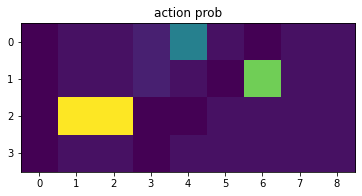

In [69]:
val_func = nnet
tree = mcts.MCTS(game,val_func,mctsargs)
# tree = tree_value
# tree = mcts.MCTS_color(game,val_func,mctsargs)
actprob=np.array(tree.getActionProb(b)).reshape(4,9)
# actprob = np.array(tree.getActionProb(b,0)).reshape(4,9)
print(actprob)
plt.imshow(actprob)
plt.title('action prob')

In [122]:
b[2,4] = 1
b=-b
b_str_rep = b.tostring()


In [124]:
b

array([[ 0,  0,  0,  0, -1,  1, -1,  1, -1],
       [ 0,  0,  0,  0, -1,  1,  1,  1, -1],
       [ 0,  0, -1,  0, -1, -1,  1, -1,  0],
       [ 0,  1,  0,  0,  0,  1,  1, -1,  1]])

In [171]:
tree_value.nnet.predict(b)

(array([0.005, 0.001, 0.002, 0.004, 0.143, 0.447, 0.003, 0.003, 0.001,
        0.004, 0.001, 0.001, 0.   , 0.011, 0.001, 0.   , 0.003, 0.001,
        0.002, 0.002, 0.002, 0.064, 0.001, 0.178, 0.   , 0.014, 0.014,
        0.003, 0.001, 0.001, 0.031, 0.006, 0.002, 0.001, 0.038, 0.007],
       dtype=float32),
 array([0.883], dtype=float32))

In [172]:
self=tree_value
s=b_str_rep
counts = np.array([self.Nsa[(s, a)] if (s, a) in self.Nsa else 0 for a in range(self.game.getActionSize())])
vals = np.array([self.Qsa[(s, a)] if (s, a) in self.Qsa else np.nan for a in range(self.game.getActionSize())]).astype(np.float32)
ps = self.Ps[s]
ns = self.Ns[s]

In [173]:
counts ** (10) /(counts ** (10)).sum()

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

Text(0.5, 1.0, 'policy')

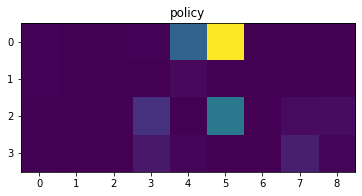

In [174]:
plt.imshow(ps.reshape(4,9))
plt.title('policy')

In [127]:
counts.reshape(4,9)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [55]:
import scipy
vals[np.isnan(vals)]=-1000
scipy.special.softmax(vals * 30).reshape(4,9)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.004, 0.   , 0.   ],
       [0.   , 0.   , 0.977, 0.   , 0.   , 0.01 , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]],
      dtype=float32)

Text(0.5, 1.0, 'final value')

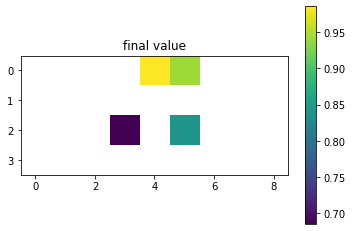

In [175]:
plt.imshow(vals.reshape(4,9))
plt.colorbar()
plt.title('final value')

In [153]:
b_copy = copy.copy(b)
b_copy[-1,1]=0
b_copy[-1,-1]=0
b_copy[-1,-4]=0
nnet.predict(b_copy)

(array([0.   , 0.005, 0.004, 0.002, 0.   , 0.   , 0.001, 0.   , 0.   ,
        0.   , 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.003, 0.01 , 0.   , 0.787, 0.   , 0.   , 0.001, 0.   , 0.093,
        0.008, 0.006, 0.01 , 0.001, 0.003, 0.052, 0.   , 0.   , 0.01 ],
       dtype=float32),
 array([-0.92], dtype=float32))

In [19]:

val_func.predict(b)[0].reshape(4,9)

array([[0.   , 0.002, 0.01 , 0.042, 0.316, 0.016, 0.001, 0.01 , 0.006],
       [0.001, 0.025, 0.015, 0.096, 0.042, 0.001, 0.056, 0.012, 0.01 ],
       [0.005, 0.076, 0.063, 0.001, 0.001, 0.03 , 0.036, 0.009, 0.014],
       [0.001, 0.009, 0.011, 0.002, 0.027, 0.01 , 0.011, 0.016, 0.017]],
      dtype=float32)

In [41]:
np.full((4,9,3),np.array([1,2,3])).swapaxes(0,-1).swapaxes(1,2)

array([[[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2]],

       [[3, 3, 3, 3, 3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3, 3, 3, 3, 3]]])

In [92]:
reload(sl)
onet = sl.OthelloNNet_resnet(game,sl.get_args(n_res=3,track_color=True, nepochs=80))

In [93]:
import beck.beck_nnet as bb
reload(bb)
nn = bb.NNetWrapper_color
nnet = nn(game,nnet=onet)
# onet.model.predict([b[None,:,:]])

In [91]:
nnet.args

{'lr': 0.001,
 'dropout': 0.3,
 'epochs': 200,
 'batch_size': 64,
 'cuda': False,
 'num_channels': 512,
 'wl2': 0.0001,
 'n_res': 3,
 'res_ks': 3,
 'track_color': True}

In [90]:
# nnet.predict_batch(b[None,:],[0])
nnet.train(te[:1])

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 5.1999 - pi_loss: 4.0232 - v_loss: 0.8571
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 2.7994 - pi_loss: 2.3045 - v_loss: 0.1741
Epoch 3/200
1/1 [==============================] - 0s 972us/step - loss: 2.0548 - pi_loss: 1.6945 - v_loss: 0.0371
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 1.9625 - pi_loss: 1.6204 - v_loss: 0.0163
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 1.9027 - pi_loss: 1.5651 - v_loss: 0.0089
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 1.8557 - pi_loss: 1.5189 - v_loss: 0.0054
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 1.8207 - pi_loss: 1.4831 - v_loss: 0.0035
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 1.7943 - pi_loss: 1.4553 - v_loss: 0.0024
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 1.7721 - pi_loss: 1.431

KeyboardInterrupt: 

In [64]:
b = game.getInitBoard()
b[0:3,0]=1
b[0:3,1] = -1

In [65]:
b

array([[ 1, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [66]:
reload(mcts)
tree = mcts.MCTS_color(game, nnet, mcts.MCTS_ARGS)

In [69]:
np.array(tree.getActionProb(b,0)).reshape(4,9)

array([[0.   , 0.   , 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003],
       [0.   , 0.   , 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003],
       [0.   , 0.   , 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003],
       [0.903, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003]])

In [70]:
np.array(tree.getActionProb(b,1)).reshape(4,9)

array([[0.   , 0.   , 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003],
       [0.   , 0.   , 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003],
       [0.   , 0.   , 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003],
       [0.927, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003]])

In [86]:
reload(sl)
te = sl.load_data(track_color=True)

In [88]:
te[1]

(array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0, -1,  0,  0,  0],
        [ 0,  0,  1, -1, -1, -1,  1,  0,  0],
        [ 0,  0,  0, -1,  0,  1,  0,  0,  0]]),
 array([0.004, 0.004, 0.004, 0.004, 0.004, 0.   , 0.924, 0.004, 0.   ,
        0.004, 0.004, 0.004, 0.   , 0.   , 0.   , 0.004, 0.004, 0.   ,
        0.004, 0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.004, 0.004,
        0.004, 0.004, 0.004, 0.   , 0.004, 0.   , 0.004, 0.004, 0.   ]),
 -1,
 0)

In [75]:
te[2][0]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [77]:
te[3][0].sum()

0

In [78]:
a = [[1],[1]]
[aa.append(2) for aa in a]

[None, None]

In [80]:
a

[[1, 2], [1, 2]]

In [225]:
!python ../classes/main.py 0

2022-01-15 15:50:38.529456: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2022-01-15 15:50:38.529487: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
['0']
2022-01-15 15:50:46 cm005.hpc.nyu.edu __main__[2324255] INFO Loading BeckGame...
2022-01-15 15:50:46 cm005.hpc.nyu.edu __main__[2324255] INFO Loading NNetWrapper...
2022-01-15 15:50:46 cm005.hpc.nyu.edu __main__[2324255] WARNING Not loading a checkpoint!
2022-01-15 15:50:46 cm005.hpc.nyu.edu __main__[2324255] INFO Loading the Coach...
2022-01-15 15:50:47 cm005.hpc.nyu.edu __main__[2324255] INFO Starting the learning process 🎉
2022-01-15 15:50:47 cm005.hpc.nyu.edu coach[2324255] INFO Starting Iter #1 ...
Self Play:   0%|                                       

In [37]:
import fiarrl.classes.coach as fcc
from fiarrl.classes import main
Coach = fcc.Coach

In [38]:
c = Coach(game,nnet,main.args) 
episode = c.executeEpisode()

In [40]:

from pickle import Pickler, Unpickler

ex_tournament = 6
ex_id = 'checkpoints_mcts100_cpuct2_id_1'
ex_fn_part = 'checkpoint_55'

ex_dir = f'/scratch/zz737/fiar/tournaments/tournament_{ex_tournament}/{ex_id}'
ex_fn = f'{ex_fn_part}.pth.tar'
load_folder_file = (ex_dir, ex_fn)

modelFile = os.path.join(load_folder_file[0], load_folder_file[1])
examplesFile = modelFile + ".examples"
with open(examplesFile, "rb") as f:
    trainExamplesHistory = Unpickler(f).load()

In [54]:
input_boards, target_pis, target_vs = list(zip(*trainExamplesHistory[2]))
input_boards = np.asarray(input_boards)
target_pis = np.asarray(target_pis)
target_vs = np.asarray(target_vs)
# color_input = np.full((4,9,len(colors)),colors).swapaxes(0,-1).swapaxes(1,2) # turn color_batch into b x 4 x 9



In [62]:
input_boards[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [63]:
b = copy.copy(input_boards[-1])
b[3,2]=1
game.getGameEnded(b,-1)

-1

In [61]:
target_vs[-1]

1.0